In [10]:
import glob

base_path = r'D:\Acad 3 - 2\Project\chrometrics\results'
all_csv_files = glob.glob(f"{base_path}\\**\\*.csv", recursive=True)

print(f"Found {len(all_csv_files)} CSV files:")
for file in all_csv_files:
    print(file)


Found 33 CSV files:
D:\Acad 3 - 2\Project\chrometrics\results\antibody\024_H6_raw_features_20250407_105737.csv
D:\Acad 3 - 2\Project\chrometrics\results\antibody\025_H7_raw_features_20250407_105739.csv
D:\Acad 3 - 2\Project\chrometrics\results\antibody\026_H8_raw_features_20250407_105740.csv
D:\Acad 3 - 2\Project\chrometrics\results\antibody\027_H9_raw_features_20250407_105743.csv
D:\Acad 3 - 2\Project\chrometrics\results\antibody\028_H10_raw_features_20250407_105746.csv
D:\Acad 3 - 2\Project\chrometrics\results\negative-control\002_G4_raw_features_20250407_105908.csv
D:\Acad 3 - 2\Project\chrometrics\results\negative-control\022_H4_raw_features_20250407_105910.csv
D:\Acad 3 - 2\Project\chrometrics\results\negative-control\042_I4_raw_features_20250407_105911.csv
D:\Acad 3 - 2\Project\chrometrics\results\negative-control\062_J4_raw_features_20250407_105913.csv
D:\Acad 3 - 2\Project\chrometrics\results\negative-control\082_K4_raw_features_20250407_105915.csv
D:\Acad 3 - 2\Project\chromet

In [11]:
import pandas as pd

# Load all CSVs into a list of DataFrames
df_list = [pd.read_csv(file) for file in all_csv_files]

# Concatenate into a single DataFrame
data = pd.concat(df_list, ignore_index=True)

print("Combined shape:", data.shape)
print(data.head())

Combined shape: (351, 202)
   label         area                perimeter             eccentricity  \
0      1  {0: 5468.0}  {0: 410.08535316173834}   {0: 0.740697606045166}   
1      2  {0: 4283.0}   {0: 310.7888886054567}  {0: 0.8269592119413867}   
2      3  {0: 4499.0}   {0: 684.3300858899106}  {0: 0.7822672678382749}   
3      4  {0: 4212.0}  {0: 280.50461735799473}  {0: 0.8831320910668858}   
4      1  {0: 4333.0}   {0: 324.5817818242701}   {0: 0.830279404796322}   

                  solidity     equivalent_diameter        major_axis_length  \
0  {0: 0.8860800518554529}  {0: 83.43904260363891}  {0: 103.86120916687692}   
1  {0: 0.9396665204036858}  {0: 73.84636057451107}   {0: 98.77440078247035}   
2  {0: 0.8572789634146342}  {0: 75.68556475156605}    {0: 99.1450666262482}   
3   {0: 0.966720220335093}  {0: 73.23172101230796}  {0: 107.26013073074122}   
4   {0: 0.939709390587725}  {0: 74.27615328850479}  {0: 100.02847743266871}   

         minor_axis_length               orient

In [20]:
data_clean = data.applymap(flatten_dict_values)
print("Before dropping:", data_clean.shape)

data_clean = data_clean.dropna()
print("After dropping:", data_clean.shape)

Before dropping: (351, 202)
After dropping: (0, 202)


C:\Users\Dell\AppData\Local\Temp\ipykernel_12976\506423820.py:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data_clean = data.applymap(flatten_dict_values)


In [22]:
print("Sample entries from data:")
for col in data.columns[:3]:  # just first 3 columns for now
    print(f"\nColumn: {col}")
    print(data[col].head(5).tolist())


Sample entries from data:

Column: label
[1, 2, 3, 4, 1]

Column: area
['{0: 5468.0}', '{0: 4283.0}', '{0: 4499.0}', '{0: 4212.0}', '{0: 4333.0}']

Column: perimeter
['{0: 410.08535316173834}', '{0: 310.7888886054567}', '{0: 684.3300858899106}', '{0: 280.50461735799473}', '{0: 324.5817818242701}']


In [26]:
import ast

def flatten_dict_values(cell):
    # Try to parse string to dict if needed
    if isinstance(cell, str):
        try:
            cell = ast.literal_eval(cell)
        except Exception:
            pass  # if it doesn't parse, we'll handle below

    if isinstance(cell, dict):
        if len(cell.values()) == 0:
            return None
        values = list(cell.values())
        return values[0] if isinstance(values[0], (int, float)) else None

    if isinstance(cell, (int, float)):
        return cell

    try:
        return float(cell)
    except (ValueError, TypeError):
        return None

data_clean = data.copy()
for col in data_clean.columns:
    data_clean[col] = data_clean[col].map(flatten_dict_values)

In [27]:
print("A raw row before flattening:\n", data.iloc[0])

A raw row before flattening:
 label                                      1
area                             {0: 5468.0}
perimeter            {0: 410.08535316173834}
eccentricity          {0: 0.740697606045166}
solidity             {0: 0.8860800518554529}
                            ...             
moments_hu-2       {0: 0.000324466553391851}
moments_hu-3      {0: 1.410503756779371e-05}
moments_hu-4     {0: -9.136728414850907e-10}
moments_hu-5     {0: -8.059992529752657e-07}
moments_hu-6    {0: -2.7518833814287867e-10}
Name: 0, Length: 202, dtype: object


In [28]:
print("After flattening:")
print(data_clean.head())
print("NaNs per column:")
print(data_clean.isna().sum())

After flattening:
   label    area   perimeter  eccentricity  solidity  equivalent_diameter  \
0      1  5468.0  410.085353      0.740698  0.886080            83.439043   
1      2  4283.0  310.788889      0.826959  0.939667            73.846361   
2      3  4499.0  684.330086      0.782267  0.857279            75.685565   
3      4  4212.0  280.504617      0.883132  0.966720            73.231721   
4      1  4333.0  324.581782      0.830279  0.939709            74.276153   

   major_axis_length  minor_axis_length  orientation  min_calliper  ...  \
0         103.861209          69.777966     0.455561            72  ...   
1          98.774401          55.537084    -1.362531            56  ...   
2          99.145067          61.761720    -0.290358            61  ...   
3         107.260131          50.318345    -0.610960            49  ...   
4         100.028477          55.750611    -0.482085            58  ...   

   moments_central-3-1  moments_central-3-2  moments_central-3-3  \


In [14]:
#K Means Clustering

In [29]:
# Fill missing with mean
data_clean = data_clean.fillna(data_clean.mean(numeric_only=True))

# Drop the label column if you're clustering
features = data_clean.drop(columns=["label"], errors="ignore")

# Standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

print("✅ Final shape for clustering:", X_scaled.shape)

✅ Final shape for clustering: (351, 201)


D:\cONDA\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
D:\cONDA\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
D:\cONDA\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [35]:
print(X.dtypes)

area                   float64
perimeter              float64
eccentricity           float64
solidity               float64
equivalent_diameter    float64
                        ...   
moments_hu-2           float64
moments_hu-3           float64
moments_hu-4           float64
moments_hu-5           float64
moments_hu-6           float64
Length: 201, dtype: object


In [36]:
X_numeric = X.apply(pd.to_numeric, errors='coerce')

In [38]:
print(X_numeric.isna().sum())  # NaNs per column
print("Total NaNs:", X_numeric.isna().sum().sum())
print("Total Infs:", np.isinf(X_numeric.values).sum())

area                   0
perimeter              0
eccentricity           0
solidity               0
equivalent_diameter    0
                      ..
moments_hu-2           0
moments_hu-3           0
moments_hu-4           0
moments_hu-5           0
moments_hu-6           0
Length: 201, dtype: int64
Total NaNs: 2106
Total Infs: 0


In [45]:
# Recheck for NaNs after fillna
print("NaNs after fillna:", X_numeric.fillna(X_numeric.mean()).isna().sum().sum())

NaNs after fillna: 2106


In [46]:
#so we have to drop the columns, since even the mean values of the column give us a NaN value

In [47]:
# Drop columns that are entirely NaN
X_clean = X_numeric.dropna(axis=1, how='all')

# Fill remaining NaNs with mean
X_clean = X_clean.fillna(X_clean.mean())

# Confirm all NaNs are gone
print("Remaining NaNs:", X_clean.isna().sum().sum())

# Scale the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

Remaining NaNs: 0


In [48]:
dropped_columns = X_numeric.columns[X_numeric.isna().all()].tolist()
print("Dropped columns (all NaN):", dropped_columns)

Dropped columns (all NaN): ['weighted_moments_normalized-0-0', 'weighted_moments_normalized-0-1', 'weighted_moments_normalized-1-0', 'moments_normalized-0-0', 'moments_normalized-0-1', 'moments_normalized-1-0']


In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

In [50]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)  # Keep 95% of variance
X_pca = pca.fit_transform(X_scaled)
print("Original shape:", X_scaled.shape)
print("Reduced shape:", X_pca.shape)

Original shape: (351, 195)
Reduced shape: (351, 27)


In [60]:
import os
os.environ["OMP_NUM_THREADS"] = "2"

In [75]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)  # Choose based on expected groups
clusters = kmeans.fit_predict(X_pca)  # Or X_scaled if skipping PCA

D:\cONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


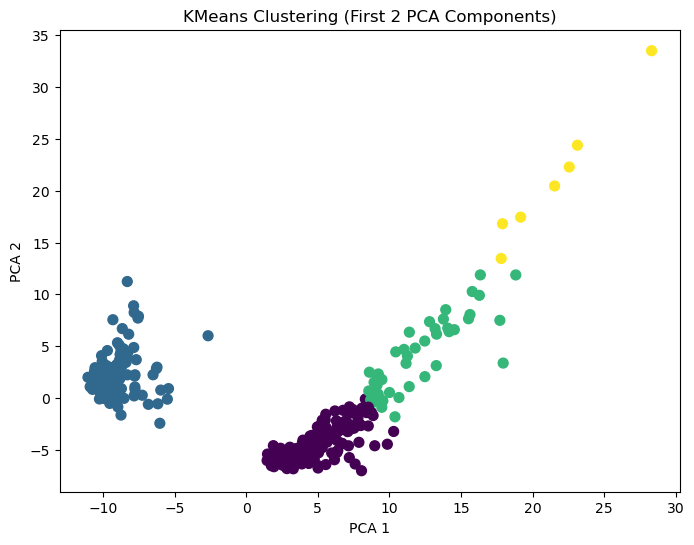

In [78]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("KMeans Clustering (First 2 PCA Components)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

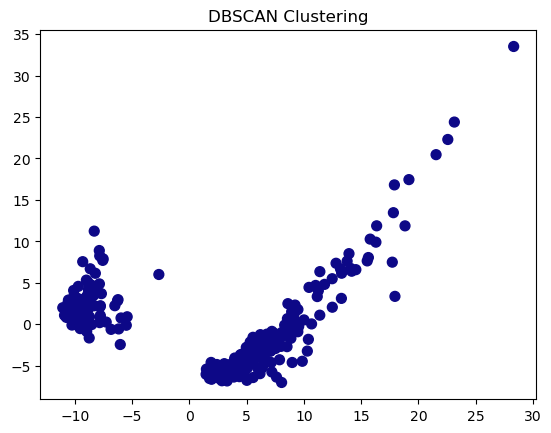

In [67]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=1.5, min_samples=5)
labels = db.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='plasma', s=50)
plt.title("DBSCAN Clustering")
plt.show()

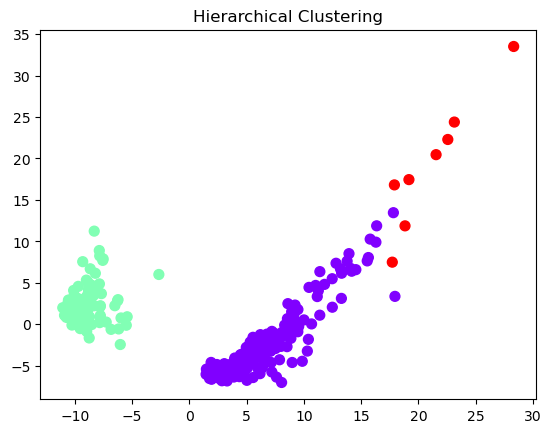

In [69]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=3)
labels = hc.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='rainbow', s=50)
plt.title("Hierarchical Clustering")
plt.show()


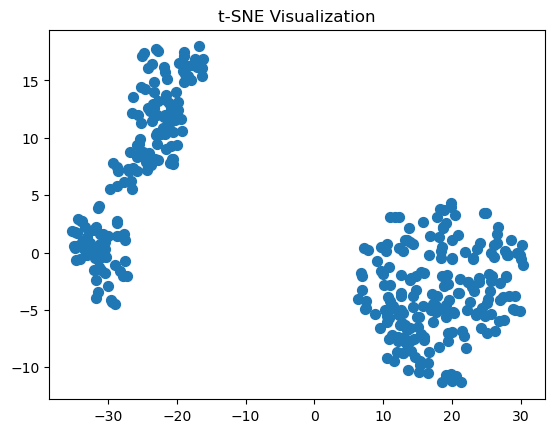

In [70]:
from sklearn.manifold import TSNE

X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=50)
plt.title("t-SNE Visualization")
plt.show()

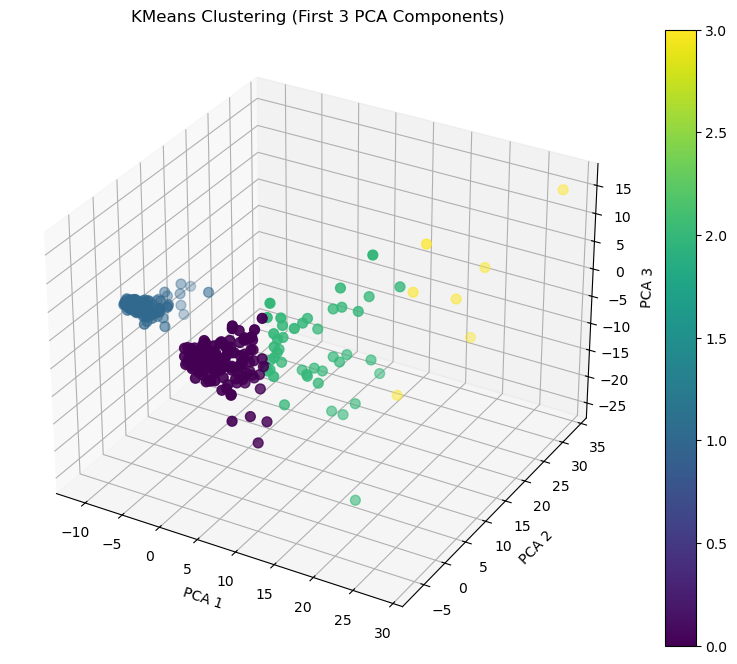

In [79]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
sc = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], c=clusters, cmap='viridis', s=50)
ax.set_title("KMeans Clustering (First 3 PCA Components)")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.colorbar(sc)
plt.show()

In [1]:
#Special Classification according to folders

In [2]:
import glob
import os
import pandas as pd

# Set the base path containing folders with CSV files
base_path = r'D:\Acad 3 - 2\Project\chrometrics\results'
# Recursively get list of CSV files
all_csv_files = glob.glob(os.path.join(base_path, '**', '*.csv'), recursive=True)

print(f"Found {len(all_csv_files)} CSV files:")
for file in all_csv_files:
    print(file)

# Create a list to hold DataFrames from each CSV file,
# adding a column 'folder' with the name of the folder (i.e., parent directory)
df_list = []
for file in all_csv_files:
    # Extract the folder name from the file path
    folder_name = os.path.basename(os.path.dirname(file))
    # Read CSV into DataFrame
    df = pd.read_csv(file)
    # Add a new column 'folder' with the folder name for all rows
    df['folder'] = folder_name
    df_list.append(df)

# Combine all DataFrames
data = pd.concat(df_list, ignore_index=True)
print("Combined shape:", data.shape)
print(data.head())


Found 33 CSV files:
D:\Acad 3 - 2\Project\chrometrics\results\antibody\024_H6_raw_features_20250407_105737.csv
D:\Acad 3 - 2\Project\chrometrics\results\antibody\025_H7_raw_features_20250407_105739.csv
D:\Acad 3 - 2\Project\chrometrics\results\antibody\026_H8_raw_features_20250407_105740.csv
D:\Acad 3 - 2\Project\chrometrics\results\antibody\027_H9_raw_features_20250407_105743.csv
D:\Acad 3 - 2\Project\chrometrics\results\antibody\028_H10_raw_features_20250407_105746.csv
D:\Acad 3 - 2\Project\chrometrics\results\negative-control\002_G4_raw_features_20250407_105908.csv
D:\Acad 3 - 2\Project\chrometrics\results\negative-control\022_H4_raw_features_20250407_105910.csv
D:\Acad 3 - 2\Project\chrometrics\results\negative-control\042_I4_raw_features_20250407_105911.csv
D:\Acad 3 - 2\Project\chrometrics\results\negative-control\062_J4_raw_features_20250407_105913.csv
D:\Acad 3 - 2\Project\chrometrics\results\negative-control\082_K4_raw_features_20250407_105915.csv
D:\Acad 3 - 2\Project\chromet

In [10]:
import ast
import numpy as np

def flatten_dict_values(cell):
    # Try to parse string to dict if needed using ast.literal_eval
    if isinstance(cell, str):
        try:
            cell = ast.literal_eval(cell)
        except Exception:
            return cell  # if it doesn't parse, return as-is
    # If it is a dict, extract the first value if it is numeric
    if isinstance(cell, dict):
        if len(cell.values()) == 0:
            return None
        values = list(cell.values())
        return values[0] if isinstance(values[0], (int, float)) else None
    
    # If already numeric, return it directly
    if isinstance(cell, (int, float)):
        return cell
    
    # Else, try to convert to float; if not possible, return the cell unchanged.
    try:
        return float(cell)
    except (ValueError, TypeError):
        return cell

# Copy the original data
data_clean = data.copy()

# Apply flattening, but SKIP the 'folder' column so that its values remain unchanged
for col in data_clean.columns:
    if col == 'folder':
        continue
    data_clean[col] = data_clean[col].map(flatten_dict_values)

print("After flattening:")
print(data_clean.head())
print("NaNs per column:")
print(data_clean.isna().sum())

After flattening:
   label    area   perimeter  eccentricity  solidity  equivalent_diameter  \
0      1  5468.0  410.085353      0.740698  0.886080            83.439043   
1      2  4283.0  310.788889      0.826959  0.939667            73.846361   
2      3  4499.0  684.330086      0.782267  0.857279            75.685565   
3      4  4212.0  280.504617      0.883132  0.966720            73.231721   
4      1  4333.0  324.581782      0.830279  0.939709            74.276153   

   major_axis_length  minor_axis_length  orientation  min_calliper  ...  \
0         103.861209          69.777966     0.455561            72  ...   
1          98.774401          55.537084    -1.362531            56  ...   
2          99.145067          61.761720    -0.290358            61  ...   
3         107.260131          50.318345    -0.610960            49  ...   
4         100.028477          55.750611    -0.482085            58  ...   

   moments_central-3-2  moments_central-3-3  moments_hu-0  moments_h

In [11]:
# Instead of operating on all columns, operate on numeric columns only.
# We want to preserve 'folder', so we separate it.
non_numeric_cols = ['folder']  # you can add more if needed

# Fill missing values in numeric columns: first, drop columns that are completely NaN (but leave folder as is)
numeric_cols = [col for col in data_clean.columns if col not in non_numeric_cols]
data_clean[numeric_cols] = data_clean[numeric_cols].dropna(axis=1, how='all')

# Fill remaining NaNs with the column mean for numeric columns
data_clean[numeric_cols] = data_clean[numeric_cols].fillna(data_clean[numeric_cols].mean(numeric_only=True))

# Check that there are no NaNs in numeric columns (folder remains as strings)
print("Remaining NaNs (numeric):", data_clean[numeric_cols].isna().sum().sum())

# Make sure folder column is intact:
print("Folder column sample:")
print(data_clean['folder'].head())

Remaining NaNs (numeric): 0
Folder column sample:
0    antibody
1    antibody
2    antibody
3    antibody
4    antibody
Name: folder, dtype: object


In [12]:
# First, drop 'label' from data_clean for clustering;
# then separate the 'folder' column to preserve its info for plotting.
features = data_clean.drop(columns=["label"], errors="ignore")
folder_info = features['folder']  # This should now contain the original folder names.
# Drop the 'folder' column from features before scaling
features = features.drop(columns=["folder"], errors="ignore")

# Convert all columns to numeric explicitly (should already be numeric now)
features = features.apply(pd.to_numeric, errors='coerce')

# Fill any remaining NaNs (if any)
features = features.fillna(features.mean())

# Check for any non-numeric issues:
print("NaNs in features:", features.isna().sum().sum())

# Standardize the features for clustering
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)
print("✅ Final shape for clustering:", X_scaled.shape)

NaNs in features: 2106
✅ Final shape for clustering: (351, 201)


D:\cONDA\Lib\site-packages\sklearn\utils\extmath.py:1137: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
D:\cONDA\Lib\site-packages\sklearn\utils\extmath.py:1142: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
D:\cONDA\Lib\site-packages\sklearn\utils\extmath.py:1162: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [15]:
# At this point, 'data_clean' should have our numeric columns and the 'folder' column preserved.
# We extract features by dropping 'label' and preserve 'folder'
features = data_clean.drop(columns=["label"], errors="ignore")
folder_info = features['folder']  # Save folder info for later plotting.
features = features.drop(columns=["folder"], errors="ignore")

# Convert all columns to numeric (if not already) -- this will force non-convertibles to NaN
features = features.apply(pd.to_numeric, errors='coerce')

# Check how many NaNs remain in the features DataFrame:
print("NaNs in features before imputation:", features.isna().sum().sum())

# Use SimpleImputer to fill NaNs with the mean value of each column
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(features)

# Verify that there are no NaNs after imputation
print("After imputation, total NaNs:", np.isnan(X_imputed).sum())

# Scale the imputed features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

print("✅ Final shape for clustering:", X_scaled.shape)

NaNs in features before imputation: 2106
After imputation, total NaNs: 0
✅ Final shape for clustering: (351, 195)


D:\cONDA\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['weighted_moments_normalized-0-0' 'weighted_moments_normalized-0-1'
 'weighted_moments_normalized-1-0' 'moments_normalized-0-0'
 'moments_normalized-0-1' 'moments_normalized-1-0']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [16]:
from sklearn.decomposition import PCA

# PCA - reduce dimensions to capture 95% variance
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
print("Original shape:", X_scaled.shape)
print("Reduced shape:", X_pca.shape)

Original shape: (351, 195)
Reduced shape: (351, 27)


D:\cONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


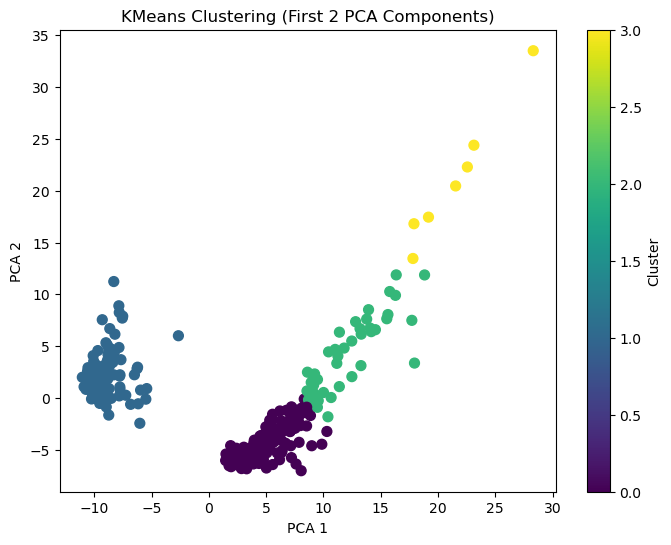

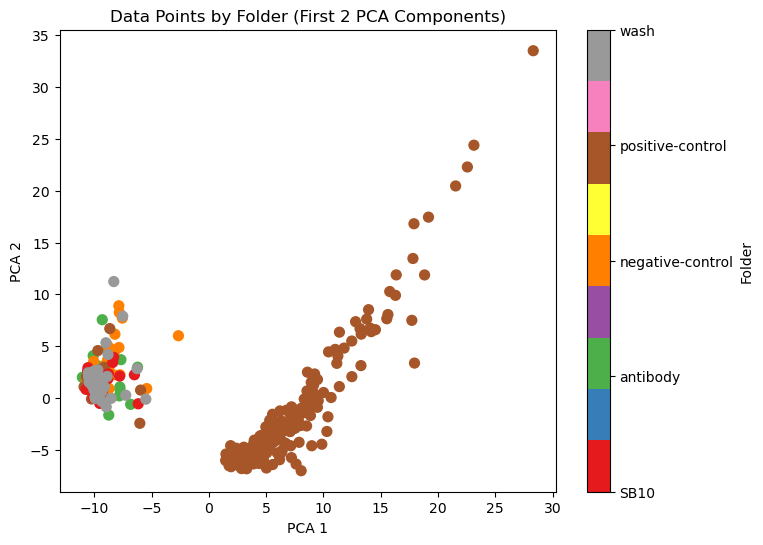

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Cluster using KMeans (choose appropriate number of clusters)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pca)

# Standard KMeans plot based on PCA 1 & 2
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50)
plt.title("KMeans Clustering (First 2 PCA Components)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Cluster")
plt.show()

# ----
# Now color the points based on folder names.
# Since folder_info is a Series of folder names, we need to encode these to numbers.
import numpy as np
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
folder_encoded = le.fit_transform(folder_info)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=folder_encoded, cmap='Set1', s=50)
plt.title("Data Points by Folder (First 2 PCA Components)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
cbar = plt.colorbar(ticks=range(len(le.classes_)))
cbar.ax.set_yticklabels(le.classes_)
cbar.set_label("Folder")
plt.show()

D:\cONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


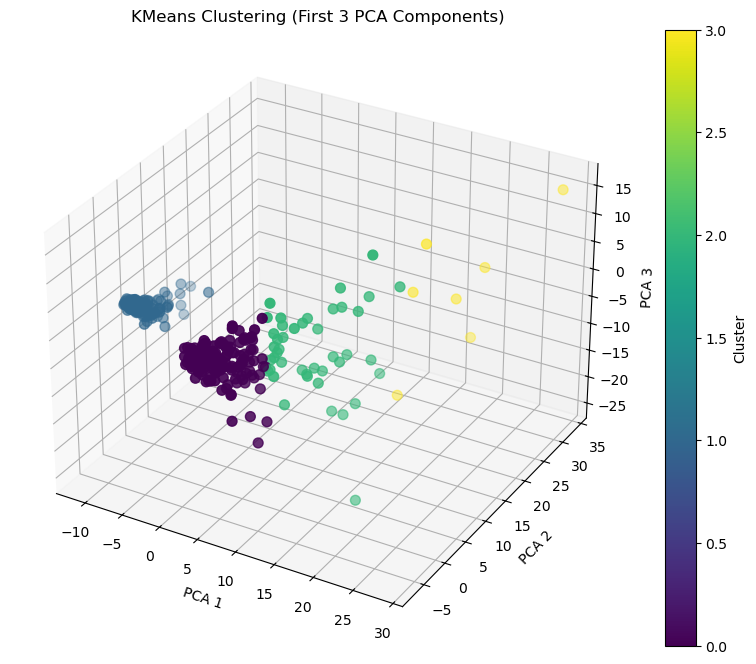

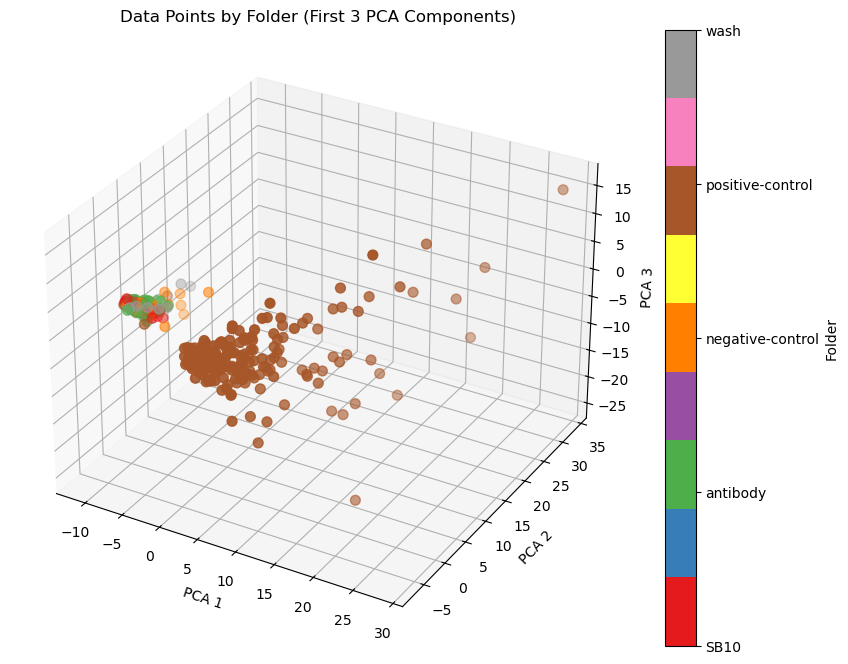

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # This import is necessary for 3D plotting
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# ---------------------------
# Assuming you already have:
# X_pca: PCA-reduced data (shape: (n_samples, 3) or more)
# folder_info: a Series of folder names from the original CSV file, preserved from earlier processing.
# ---------------------------

# For a 3D plot, we need at least 3 PCA components.
# Let's create a 3D scatter plot using PCA components 1, 2, and 3.

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 1. Plot by KMeans cluster labels
# Run KMeans with a chosen number of clusters (4 in this example)
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(X_pca)  # assuming X_pca has at least 3 components

# Plot clusters in 3D: use first 3 PCA components for x, y, z.
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                     c=clusters, cmap='viridis', s=50)
ax.set_title("KMeans Clustering (First 3 PCA Components)")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")
plt.colorbar(scatter, ax=ax, label="Cluster")
plt.show()

# ---------------------------
# Alternatively, plot by folder (encoding folder names to numbers)
le = LabelEncoder()
folder_encoded = le.fit_transform(folder_info)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                     c=folder_encoded, cmap='Set1', s=50)
ax.set_title("Data Points by Folder (First 3 PCA Components)")
ax.set_xlabel("PCA 1")
ax.set_ylabel("PCA 2")
ax.set_zlabel("PCA 3")

# Creating a color bar that shows folder names
cbar = plt.colorbar(scatter, ax=ax, ticks=range(len(le.classes_)))
cbar.ax.set_yticklabels(le.classes_)
cbar.set_label("Folder")
plt.show()